<a href="https://colab.research.google.com/github/KarolMartinez/challengeTelecom/blob/main/ProyectoTelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import requests
import pandas as pd

# URL RAW del JSON (API)
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Extraer datos desde la API
response = requests.get(url)
data = response.json()

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar las primeras filas para validar
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformación

In [2]:
import pandas as pd
import requests

# Extraer JSON desde la URL RAW
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

# Desanidar las columnas con diccionarios
churn_df = pd.json_normalize(df['Churn'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Desanidar la columna 'customer' en columnas nuevas
customer_expanded = pd.json_normalize(df['customer'])

# Unir al DataFrame original y quitar la columna original anidada
df = df.drop(columns='customer').join(customer_expanded)


# Unir todo en DataFrame plano
df_flat = pd.concat([
    df.drop(columns=['Churn', 'phone', 'internet', 'account']),
    churn_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

# Verificamos cómo queda
df_flat.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df_flat.columns = df_flat.columns.str.strip()         # Quita espacios al inicio y final
df_flat.columns = df_flat.columns.str.replace('.', '_')  # Reemplaza puntos por guiones bajos
df_flat.columns = df_flat.columns.str.replace('\n', '')  # Quita saltos de línea
print(df_flat.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total']


In [6]:
df_flat['Cuentas_Diarias'] = df_flat['Charges_Monthly'] / 30
df_flat.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


#📊 Carga y análisis

In [8]:
# Estadísticas descriptivas generales
df_flat.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
Charges_Monthly,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
Cuentas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


In [9]:
print("Media:", df_flat['Charges_Monthly'].mean())
print("Mediana:", df_flat['Charges_Monthly'].median())
print("Desviación estándar:", df_flat['Charges_Monthly'].std())
print("Media:", df_flat['Cuentas_Diarias'].mean())
print("Mediana:", df_flat['Cuentas_Diarias'].median())
print("Desviación estándar:", df_flat['Cuentas_Diarias'].std())

Media: 64.72009770194028
Mediana: 70.3
Desviación estándar: 30.12957188566699
Media: 2.1573365900646757
Mediana: 2.3433333333333333
Desviación estándar: 1.0043190628555607


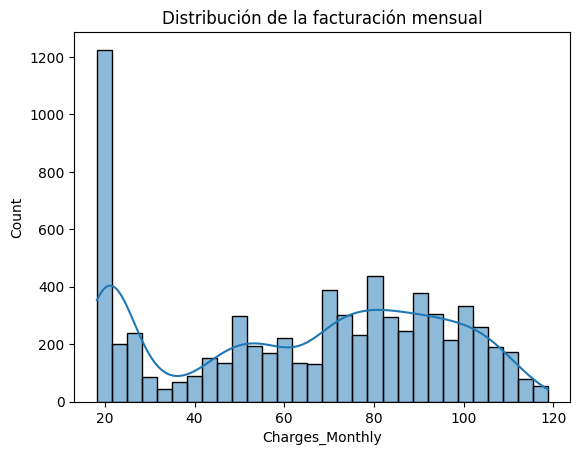

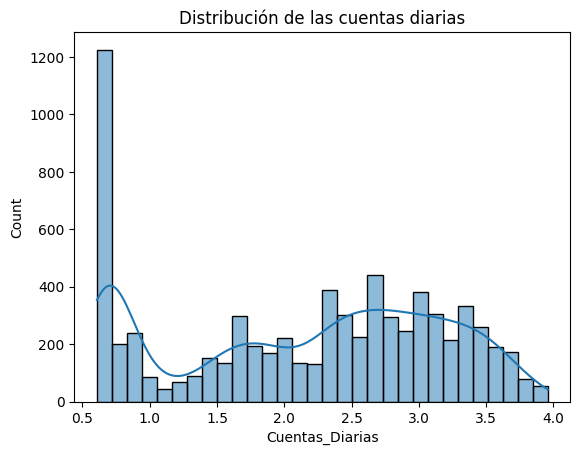

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de facturación mensual
sns.histplot(df_flat['Charges_Monthly'], bins=30, kde=True)
plt.title("Distribución de la facturación mensual")
plt.show()

# Histograma de cuentas diarias
sns.histplot(df_flat['Cuentas_Diarias'], bins=30, kde=True)
plt.title("Distribución de las cuentas diarias")
plt.show()

In [11]:
# Correlación entre variables numéricas
df_flat.corr(numeric_only=True)

,SeniorCitizen,tenure,Charges_Monthly,Cuentas_Diarias
SeniorCitizen,1.000000,0.018187,0.220388,0.220388
tenure,0.018187,1.000000,0.247982,0.247982
Charges_Monthly,0.220388,0.247982,1.000000,1.000000
Cuentas_Diarias,0.220388,0.247982,1.000000,1.000000


In [16]:
# Ambas columnas en formato numérico
df_flat['Charges_Monthly'] = pd.to_numeric(df_flat['Charges_Monthly'], errors='coerce')
df_flat['tenure'] = pd.to_numeric(df_flat['tenure'], errors='coerce')

# Crear la columna de total gastado
df_flat['Charges_Total'] = df_flat['Charges_Monthly'] * df_flat['tenure']

In [23]:
print(df['customer'][0])  # Muestra un ejemplo del contenido original


{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}


/tmp/ipython-input-3162547333.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_flat, x='Churn', palette='pastel')
/tmp/ipython-input-3162547333.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_flat, x='gender', palette='Set2')


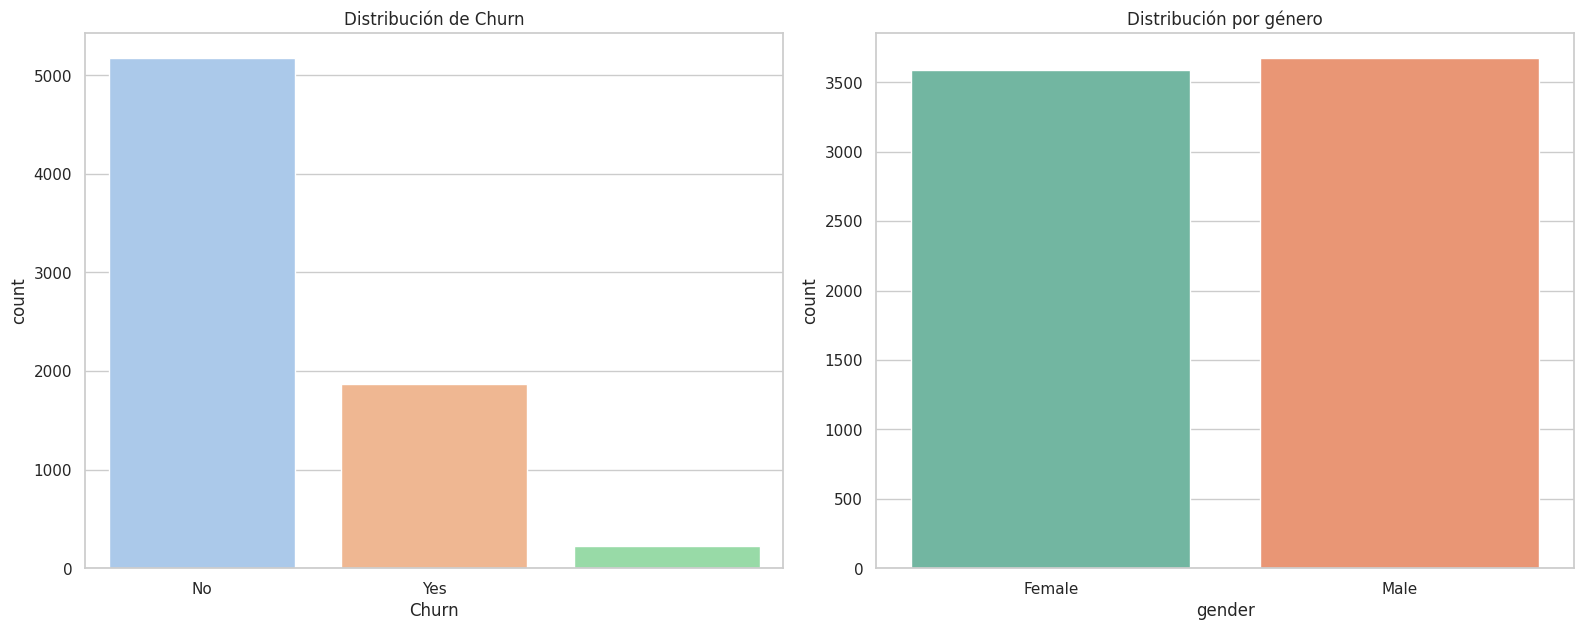

In [24]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Descargar los datos desde la API
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# 2. Convertir a DataFrame
df = pd.DataFrame(data)

# 3. Expandir la columna 'customer' en columnas separadas
customer_df = pd.json_normalize(df['customer'])

# 4. Combinar con columnas 'customerID' y 'Churn'
df_flat = pd.concat([df[['customerID', 'Churn']], customer_df], axis=1)

# 5. Gráficas de distribución
plt.figure(figsize=(16, 12))

# Distribución de Churn
plt.subplot(2, 2, 1)
sns.countplot(data=df_flat, x='Churn', palette='pastel')
plt.title('Distribución de Churn')

# Distribución por género
plt.subplot(2, 2, 2)
sns.countplot(data=df_flat, x='gender', palette='Set2')
plt.title('Distribución por género')

plt.tight_layout()
plt.show()

#📄Informe final

#Informe de Análisis de Evasión de Clientes (Churn) en TelecomX ⏲
---
## Introducción

La retención de clientes es uno de los principales desafíos en el sector de telecomunicaciones. Este análisis tiene como objetivo estudiar el fenómeno de **evasión de clientes (Churn)** en la empresa **TelecomX**, utilizando datos simulados. A través de la exploración de patrones y características de los usuarios, se busca identificar factores que influyen en la decisión de abandonar el servicio.

---
## Limpieza y tratamiento de Datos
Se realizaron los siguientes pasos para preparar los datos:

- **Importación desde una API**: Se descargaron los datos en formato JSON desde un repositorio público de GitHub.
- **Conversión a DataFrame**: Se transformó el JSON en un DataFrame utilizando `pandas`.
- **Normalización de datos anidados**: La columna `'customer'` contenía información estructurada, que fue expandida en columnas individuales.
- **Combinación de columnas clave**: Se integraron las columnas `'customerID'`, `'Churn'` y `'Contract'` con el DataFrame normalizado para facilitar el análisis.
---
## Análisis exploratorio
- Se realizaron varias visualizaciones para entender mejor el comportamiento de los clientes.
- La mayoría de los clientes permanecen (Churn = No), pero hay una proporción considerable que ha abandonado el servicio (Churn = Yes).
- También se detectó una tercera categoría que podría representar datos faltantes o mal etiquetados.
---
## Conclusiones
- Contratos mensuales están fuertemente asociados con la evasión.
- Clientes con menor antigüedad (tenure) tienden a abandonar más rápido.
- La variable género no muestra una diferencia significativa en la tasa de Churn.
- La visualización de patrones permite identificar segmentos vulnerables, como usuarios nuevos con contratos flexibles.
---
### Recomendaciones
- Incentivar contratos a largo plazo mediante descuentos o beneficios exclusivos.
- Implementar programas de fidelización para clientes nuevos en los primeros meses.
- Monitorear activamente los clientes con contratos mensuales y ofrecerles mejoras personalizadas.
- Realizar encuestas de satisfacción para entender mejor las causas de evasión.